In [29]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

from matplotlib import rc, animation
rc('animation', html='html5')

#from JSAnimation import IPython_display
from IPython.display import HTML
from matplotlib.ticker import (AutoMinorLocator, MultipleLocator)
#%precision %.2f


import os
os.getcwd()

'c:\\users\\cinderella\\datasci\\datascience\\elitedatascience\\07-CapstoneProject\\Final'

In [30]:
os.chdir('c:\\users\\cinderella\\datasci\\datascience\\elitedatascience\\07-CapstoneProject\\Final')

In [31]:
##Attempt number three
## Behold, "Year" is not the index--it took several attempts to realize this should not
## be the case. Year is going to be a text label that continues to change with each frame
## update.
df= pd.read_csv('./Data-LATEST-NotVX/yieldCurve.csv')

In [32]:
#double check the import
df.head()

,Date,1 mo,2 mo,3 mo,6 mo,1 yr,2 yr,3 yr,5 yr,7 yr,10 yr,20 yr,30 yr
0,1/2/1990,NaN,NaN,7.83,7.89,7.81,7.87,7.90,7.87,7.98,7.94,NaN,8.00
1,1/3/1990,NaN,NaN,7.89,7.94,7.85,7.94,7.96,7.92,8.04,7.99,NaN,8.04
2,1/4/1990,NaN,NaN,7.84,7.90,7.82,7.92,7.93,7.91,8.02,7.98,NaN,8.04
3,1/5/1990,NaN,NaN,7.79,7.85,7.79,7.90,7.94,7.92,8.03,7.99,NaN,8.06
4,1/8/1990,NaN,NaN,7.79,7.88,7.81,7.90,7.95,7.92,8.05,8.02,NaN,8.09


In [33]:
df['Date'] = pd.to_datetime(df['Date'])

In [34]:
df['problem'] = np.where(df['Date']< '01/03/2007', 'X', '')

In [35]:
df.loc[(df['problem'] == 'X')]

,Date,1 mo,2 mo,3 mo,6 mo,1 yr,2 yr,3 yr,5 yr,7 yr,10 yr,20 yr,30 yr,problem
0,1990-01-02,NaN,NaN,7.83,7.89,7.81,7.87,7.90,7.87,7.98,7.94,NaN,8.00,X
1,1990-01-03,NaN,NaN,7.89,7.94,7.85,7.94,7.96,7.92,8.04,7.99,NaN,8.04,X
2,1990-01-04,NaN,NaN,7.84,7.90,7.82,7.92,7.93,7.91,8.02,7.98,NaN,8.04,X
3,1990-01-05,NaN,NaN,7.79,7.85,7.79,7.90,7.94,7.92,8.03,7.99,NaN,8.06,X
4,1990-01-08,NaN,NaN,7.79,7.88,7.81,7.90,7.95,7.92,8.05,8.02,NaN,8.09,X
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4248,2006-12-26,4.81,NaN,4.99,5.11,4.97,4.71,4.63,4.58,4.59,4.61,4.82,4.73,X
4249,2006-12-27,4.75,NaN,4.97,5.10,4.99,4.77,4.69,4.64,4.64,4.66,4.87,4.78,X
4250,2006-12-28,4.74,NaN,5.00,5.10,5.01,4.82,4.72,4.69,4.69,4.70,4.90,4.81,X
4251,2006-12-29,4.75,NaN,5.02,5.09,5.00,4.82,4.74,4.70,4.70,4.71,4.91,4.81,X


In [36]:
cond = df['problem'] == 'X'
rows = df.loc[cond, :]
df.drop(rows.index, inplace=True)
del df['problem']

In [37]:
df.head()

,Date,1 mo,2 mo,3 mo,6 mo,1 yr,2 yr,3 yr,5 yr,7 yr,10 yr,20 yr,30 yr
4253,2007-01-03,4.84,NaN,5.05,5.09,4.98,4.76,4.69,4.66,4.66,4.67,4.85,4.77
4254,2007-01-04,4.80,NaN,5.04,5.07,4.95,4.71,4.63,4.61,4.61,4.62,4.81,4.72
4255,2007-01-05,4.81,NaN,5.05,5.09,4.98,4.76,4.68,4.65,4.65,4.65,4.84,4.74
4256,2007-01-08,4.87,NaN,5.08,5.13,5.01,4.78,4.70,4.66,4.66,4.66,4.84,4.74
4257,2007-01-09,4.90,NaN,5.08,5.13,5.02,4.79,4.70,4.65,4.65,4.66,4.83,4.74


In [38]:
df['2 mo'].fillna(0, inplace=True)
df

,Date,1 mo,2 mo,3 mo,6 mo,1 yr,2 yr,3 yr,5 yr,7 yr,10 yr,20 yr,30 yr
4253,2007-01-03,4.84,0.00,5.05,5.09,4.98,4.76,4.69,4.66,4.66,4.67,4.85,4.77
4254,2007-01-04,4.80,0.00,5.04,5.07,4.95,4.71,4.63,4.61,4.61,4.62,4.81,4.72
4255,2007-01-05,4.81,0.00,5.05,5.09,4.98,4.76,4.68,4.65,4.65,4.65,4.84,4.74
4256,2007-01-08,4.87,0.00,5.08,5.13,5.01,4.78,4.70,4.66,4.66,4.66,4.84,4.74
4257,2007-01-09,4.90,0.00,5.08,5.13,5.02,4.79,4.70,4.65,4.65,4.66,4.83,4.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,2020-08-17,0.09,0.10,0.10,0.12,0.13,0.14,0.18,0.29,0.49,0.69,1.19,1.43
7664,2020-08-18,0.08,0.09,0.09,0.13,0.13,0.14,0.17,0.27,0.47,0.67,1.16,1.40
7665,2020-08-19,0.07,0.09,0.11,0.12,0.13,0.14,0.17,0.29,0.48,0.68,1.20,1.42
7666,2020-08-20,0.08,0.09,0.11,0.13,0.12,0.13,0.15,0.26,0.46,0.65,1.15,1.38


In [39]:
df.describe()

,1 mo,2 mo,3 mo,6 mo,1 yr,2 yr,3 yr,5 yr,7 yr,10 yr,20 yr,30 yr
count,3414.000000,3415.000000,3411.000000,3414.000000,3414.000000,3414.000000,3414.000000,3414.000000,3414.000000,3414.000000,3414.000000,3414.000000
mean,0.843617,0.213804,0.888209,0.982897,1.069722,1.266011,1.481362,1.930375,2.306356,2.653732,3.185858,3.377393
std,1.272135,0.633983,1.283056,1.297745,1.260069,1.150328,1.078746,0.984953,0.930281,0.917580,0.961125,0.868606
min,0.000000,0.000000,0.000000,0.020000,0.080000,0.110000,0.100000,0.190000,0.360000,0.520000,0.870000,0.990000
25%,0.040000,0.000000,0.060000,0.120000,0.180000,0.420000,0.770000,1.342500,1.670000,2.002500,2.550000,2.840000
50%,0.140000,0.000000,0.160000,0.280000,0.460000,0.840000,1.200000,1.730000,2.160000,2.520000,2.930000,3.130000
75%,1.530000,0.000000,1.560000,1.617500,1.710000,1.717500,1.810000,2.430000,2.857500,3.210000,4.030000,4.197500
max,5.270000,2.480000,5.190000,5.190000,5.120000,5.100000,5.130000,5.180000,5.210000,5.260000,5.440000,5.350000


In [40]:
# Make 3 separate copies of the df
# One to hold the the x variables to plot (Jan - Dec)
dfx = df.copy()

In [41]:
# One for the y variables (the values for the Month variables)
dfy = df.copy()

In [42]:
# One to hold the t (for title) variables -- the Years
# Which we hope changes dynamically with the animation  
dft = df.copy()

In [43]:
### X VAR DF
# for the x variables, get rid of Year and Ave columns
dfx.head()
del dfx['Date']

In [44]:
dfx.head()

,1 mo,2 mo,3 mo,6 mo,1 yr,2 yr,3 yr,5 yr,7 yr,10 yr,20 yr,30 yr
4253,4.84,0.0,5.05,5.09,4.98,4.76,4.69,4.66,4.66,4.67,4.85,4.77
4254,4.80,0.0,5.04,5.07,4.95,4.71,4.63,4.61,4.61,4.62,4.81,4.72
4255,4.81,0.0,5.05,5.09,4.98,4.76,4.68,4.65,4.65,4.65,4.84,4.74
4256,4.87,0.0,5.08,5.13,5.01,4.78,4.70,4.66,4.66,4.66,4.84,4.74
4257,4.90,0.0,5.08,5.13,5.02,4.79,4.70,4.65,4.65,4.66,4.83,4.74


In [45]:
# the variables(columns) are already in the correct order (for the months of the year, meaningg
# Jan is First, then we have Feb, Mar and so on..) but this isn't enough. to plot our points
# you will need January's values to have an 'x' value of '1' so they will be mapped first, 
# Feb is number 2 and so on. Doing so keeps the x values in order so that we keep the months in order,
# and then the 'y' value will be the amount of inflation for a particular index row for a 
# particular month 1,3,5,7,9,11,13,15,17,19,21,23
dfx['1 mo'] = 1
dfx['2 mo'] = 3
dfx['3 mo'] = 5
dfx['6 mo'] = 7
dfx['1 yr'] = 9
dfx['2 yr'] = 11
dfx['3 yr'] = 13
dfx['5 yr'] = 15
dfx['7 yr'] = 17
dfx['10 yr'] = 19
dfx['20 yr'] = 21
dfx['30 yr'] = 23
# take a look at it to make sure you didn't goof somewhere
dfx.head()


,1 mo,2 mo,3 mo,6 mo,1 yr,2 yr,3 yr,5 yr,7 yr,10 yr,20 yr,30 yr
4253,1,3,5,7,9,11,13,15,17,19,21,23
4254,1,3,5,7,9,11,13,15,17,19,21,23
4255,1,3,5,7,9,11,13,15,17,19,21,23
4256,1,3,5,7,9,11,13,15,17,19,21,23
4257,1,3,5,7,9,11,13,15,17,19,21,23


In [46]:
## Y VAR DF
# grab the Y DF you created earlier
dfy.head()
# get rid of the Year and Ave columns
del dfy['Date']

In [47]:
# Your final Y should look like this
dfy.head()

,1 mo,2 mo,3 mo,6 mo,1 yr,2 yr,3 yr,5 yr,7 yr,10 yr,20 yr,30 yr
4253,4.84,0.0,5.05,5.09,4.98,4.76,4.69,4.66,4.66,4.67,4.85,4.77
4254,4.80,0.0,5.04,5.07,4.95,4.71,4.63,4.61,4.61,4.62,4.81,4.72
4255,4.81,0.0,5.05,5.09,4.98,4.76,4.68,4.65,4.65,4.65,4.84,4.74
4256,4.87,0.0,5.08,5.13,5.01,4.78,4.70,4.66,4.66,4.66,4.84,4.74
4257,4.90,0.0,5.08,5.13,5.02,4.79,4.70,4.65,4.65,4.66,4.83,4.74


In [48]:
## And now for the Title DF
# fetch your title df
dft.head()

,Date,1 mo,2 mo,3 mo,6 mo,1 yr,2 yr,3 yr,5 yr,7 yr,10 yr,20 yr,30 yr
4253,2007-01-03,4.84,0.0,5.05,5.09,4.98,4.76,4.69,4.66,4.66,4.67,4.85,4.77
4254,2007-01-04,4.80,0.0,5.04,5.07,4.95,4.71,4.63,4.61,4.61,4.62,4.81,4.72
4255,2007-01-05,4.81,0.0,5.05,5.09,4.98,4.76,4.68,4.65,4.65,4.65,4.84,4.74
4256,2007-01-08,4.87,0.0,5.08,5.13,5.01,4.78,4.70,4.66,4.66,4.66,4.84,4.74
4257,2007-01-09,4.90,0.0,5.08,5.13,5.02,4.79,4.70,4.65,4.65,4.66,4.83,4.74


In [49]:
# remove everything but the Date column
dft = dft[['Date']]

In [50]:
dft.dtypes

Date    datetime64[ns]
dtype: object

In [51]:
dft['Date'] = dft['Date'].astype(str)
dft.head()

,Date
4253,2007-01-03
4254,2007-01-04
4255,2007-01-05
4256,2007-01-08
4257,2007-01-09


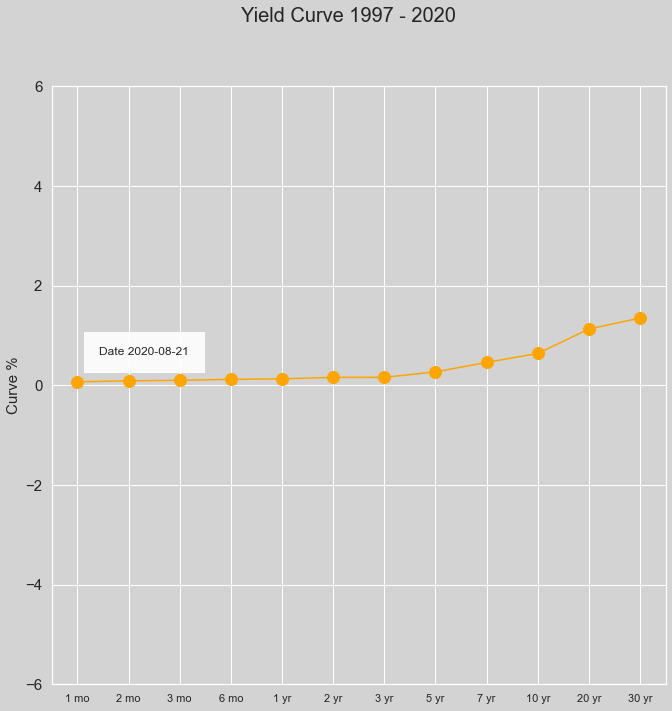

In [52]:
######## Animate Yield Curve
## 
sns.set(rc={'axes.facecolor':'lightgrey', 
            'figure.facecolor':'lightgrey','figure.edgecolor':'black',
            'axes.grid':True})
df_x = dfx
df_y = dfy
df_t = dft

Writer = animation.writers['ffmpeg']
writer = Writer(fps=30, metadata=dict(artist='LBB'), bitrate=1800)

fig, ax = plt.subplots(figsize=(11, 11))
fig.suptitle('Yield Curve 1997 - 2020', fontsize=20)

# either set up sensible limits here that won't change during the animation
# or see the comment in function `update()`
ax.set_xlim(0,24)
ax.set_ylim(-6,6)

#ax.set_xlabel('xlabel', fontsize='medium')
ax.set_ylabel('Curve %', fontsize='medium')

ax.xaxis.label.set_size(15)
ax.yaxis.label.set_size(15)

ax.set_xticks([1,3,5,7,9,11,13,15,17,19,21,23])
ax.set_xticklabels(['1 mo' ,'2 mo','3 mo','6 mo','1 yr','2 yr','3 yr','5 yr','7 yr','10 yr',
                    '20 yr','30 yr'])
ax.tick_params(axis = 'y', which = 'major', labelsize = 15 )

btitle = ax.text(0.15,0.55, "", bbox={'facecolor':'w', 'alpha':0.9, 'pad':15},
                transform=ax.transAxes, ha="center")

graph, = ax.plot([],[], '-o', markersize=12, color='orange')


def get_data_x(i):
    return df_x.loc[i]

def get_data_y(i):
    return df_y.loc[i]

def get_data_t(i):
    return df_t.loc[i]

def update(i):
    x = get_data_x(i)
    y = get_data_y(i)
    t = get_data_t(i)
    graph.set_data(x,y)
    btitle.set_text((('Date {[Date]}'.format(t))))
    btitle.set_fontsize = 15
    # if you don't know the range of your data, you can use the following
    # instructions to rescale the axes.
    #ax.relim()
    #ax.autoscale_view()
    return graph, btitle,


# Creating the Animation object
ani = animation.FuncAnimation(fig, update,  
                              frames=(dfx.index), 
                              interval=700, blit=True)

# plt.show()

#HTML(ani.to_html5_video()) #uncomment this line and comment out the line below to see the animation within the notebook

ani.save('./Animations/yieldCurve.mpg', writer=writer)